In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('../Original/googleplaystore.csv')

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### The data look pretty good. There are some columns that might need to be cleaned in the future but for now looks ok 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### There is some missing data in our dataset but the most missing data is in the 'Rating' column. Lets get a more clear view of that

In [5]:
total = data.isna().sum()
precent = total/data.isna().count()
missing = {'Total': total, 'Precent': precent}
missing_df = pd.DataFrame(data=missing)
print(missing_df)

                Total   Precent
App                 0  0.000000
Category            0  0.000000
Rating           1474  0.135965
Reviews             0  0.000000
Size                0  0.000000
Installs            0  0.000000
Type                1  0.000092
Price               0  0.000000
Content Rating      1  0.000092
Genres              0  0.000000
Last Updated        0  0.000000
Current Ver         8  0.000738
Android Ver         3  0.000277


### 1486 missing data values in total and 1474 just in the 'Rating' column which is 13.5% from all of our data.

In [6]:
data.dropna(how='any', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


### I dropped all the missing values from the dataset as it wont affect too much the exploritory data analysis process much...But, most likely I'll fill them up in the machine learning section

In [7]:
print(len(data['Category'].unique()), 'categories\n', data['Category'].unique())

33 categories
 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


### The dataset contains 33app categories. Let's see how much apps each category has!

Text(0.5, 1.0, 'Amount of Apps For Each Category')

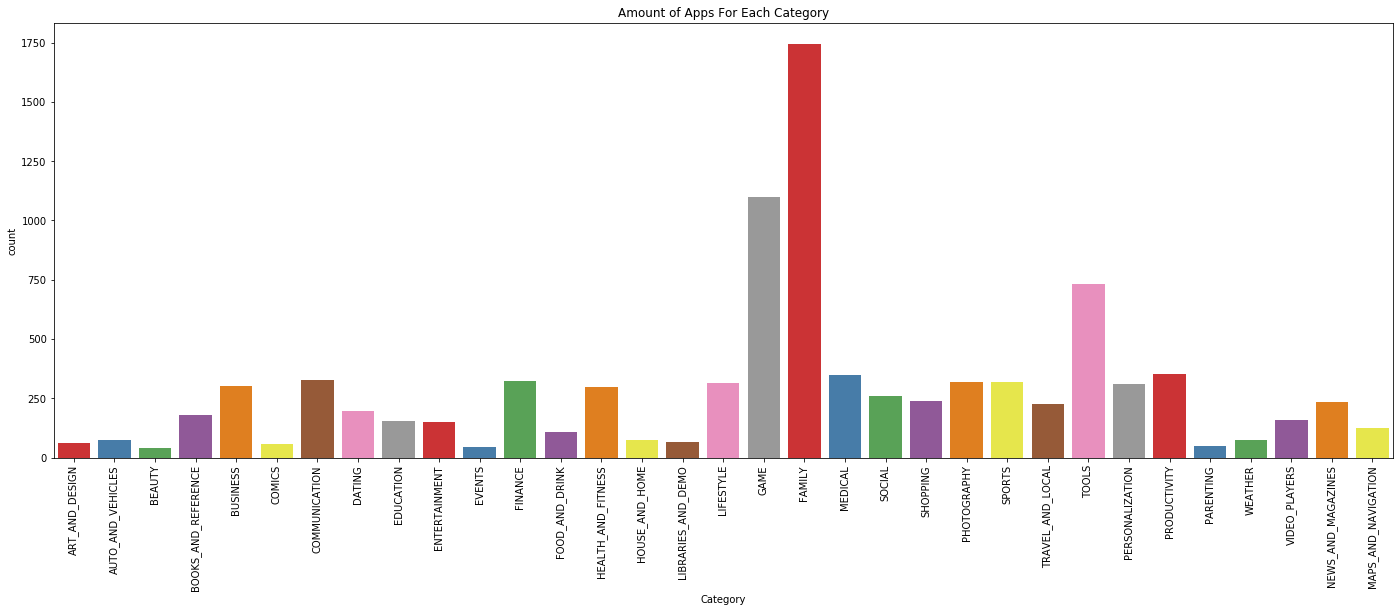

In [8]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(24,8)

cp = sns.countplot(x="Category", data=data, palette="Set1")
cp.set_xticklabels(cp.get_xticklabels(), rotation=90)
cp.set_title("Amount of Apps For Each Category")

### Familt, Game and Tools are in the top 3 Categories which have the highest amount of apps. Now let's check out the 'Rating' section in this dataset

In [9]:
data['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

### Interestingly enough the average app rating in this dataset is 4.2 with a std of 0.5. Let's get a better view of this information

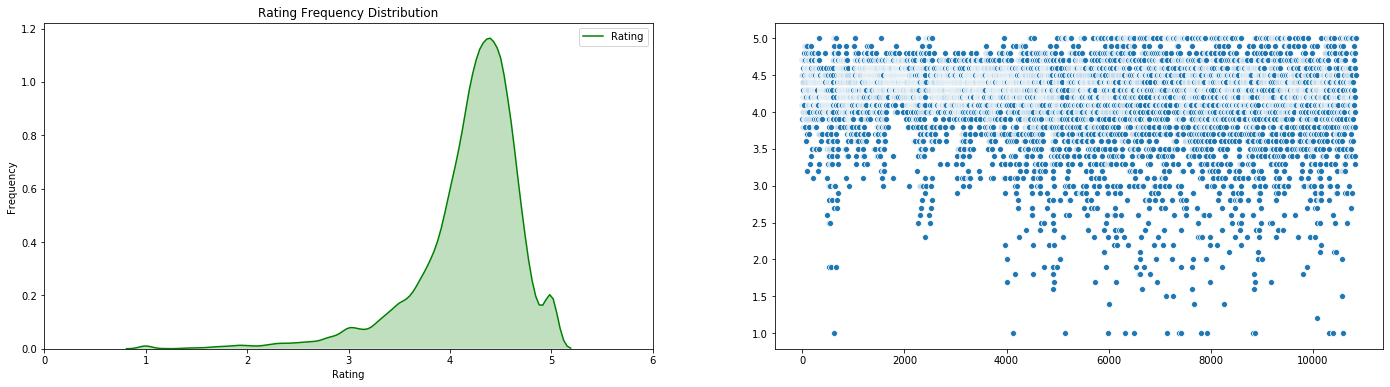

In [10]:
fig1 ,ax1 = plt.subplots(1,2)
fig1.set_size_inches(24,6)

k = sns.kdeplot(data['Rating'], shade=True, color="g", ax=ax1[0])
ax1[0].set_xlabel('Rating')
ax1[0].set(xlim=(0, 6))
ax1[0].set_ylabel('Frequency')
ax1[0].set_title('Rating Frequency Distribution')

s = sns.scatterplot(data=data['Rating'])

### By plotting the kernel distribution plot we can see that most of the app rating is between 4.0 and 4.5 which is pretty amazing becuase it means that most of the apps in the dataset are of high quality! Let's explore alittle bit more about the rating...

Text(0.5, 1.0, 'Average App Rating For Each App Category')

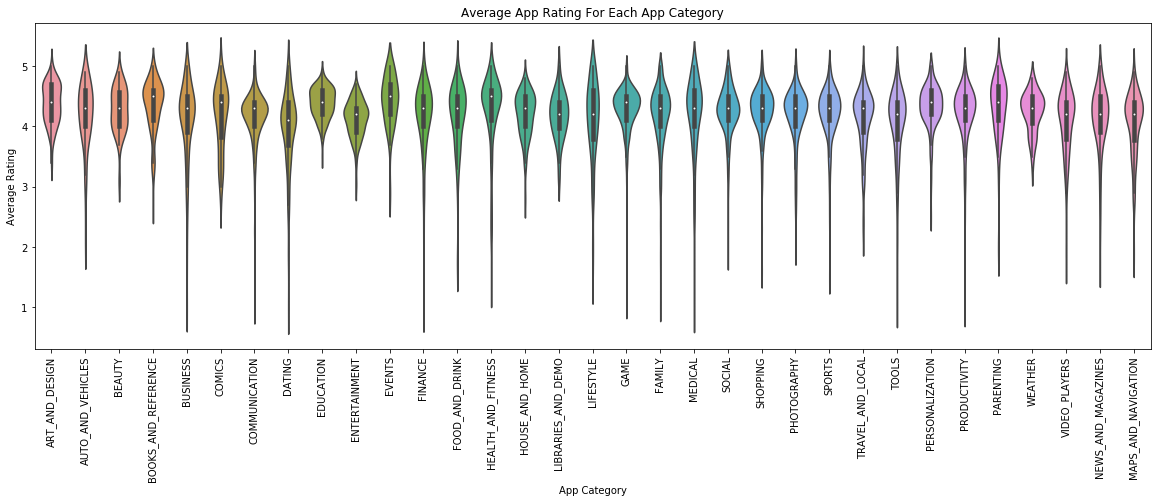

In [11]:
fig2, ax2 = plt.subplots(1,1)
fig2.set_size_inches(20,6) 

v=sns.violinplot(x='Category', y='Rating', data=data)
v.set_xticklabels(v.get_xticklabels(), rotation=90)
v.set_xlabel('App Category')
v.set_ylabel('Average Rating')
v.set_title('Average App Rating For Each App Category')

### By plotting the violin plot we can see more clearly the rating's spread in each app category.

In [12]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [13]:
data['Reviews'].value_counts().head(20)

2     83
3     78
5     74
4     74
1     67
7     62
6     62
8     57
12    53
10    46
11    39
9     39
13    37
17    36
19    33
16    31
14    30
21    29
20    28
25    27
Name: Reviews, dtype: int64

In [14]:
data['Reviews'].value_counts().tail(20)

49381      1
615        1
84311      1
2048       1
18751      1
13330      1
1387       1
130272     1
108741     1
6212081    1
174531     1
63576      1
10323      1
10447      1
2312084    1
382100     1
46242      1
745245     1
234589     1
166251     1
Name: Reviews, dtype: int64

Text(0.5, 1.0, 'Distribution of Reveiws')

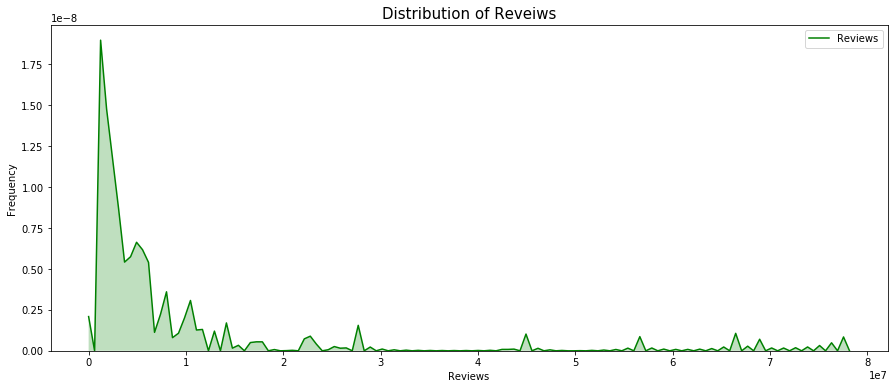

In [15]:
fig3, ax3 = plt.subplots(1,1)
fig3.set_size_inches(15,6) 

kr = sns.kdeplot(data['Reviews'], shade=True, color="g", ax=ax3)
kr.set_xlabel("Reviews")
kr.set_ylabel("Frequency")
kr.set_title('Distribution of Reveiws',size = 15)

In [16]:
data['Reviews'] = data['Reviews'].apply(lambda x: int(x))
data[data.Reviews > 1000000].head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,Varies with device,"100,000,000+",Free,0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,"1,000,000,000+",Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,Varies with device,"10,000,000+",Free,0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35M,"100,000,000+",Free,0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
201,Facebook Pages Manager,BUSINESS,4.0,1279184,Varies with device,"50,000,000+",Free,0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35M,"100,000,000+",Free,0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
297,LINE WEBTOON - Free Comics,COMICS,4.5,1013635,Varies with device,"10,000,000+",Free,0,Teen,Comics,"July 31, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device


### As we can see apps that have more than 1 million reviews are mostly well known apps such as: Whatsapp, Gmail, Facebook related apps. Let's see which category has most well known apps

In [17]:
famous_apps = data[data.Reviews > 1000000]
famous_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 139 to 10707
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             704 non-null    object 
 1   Category        704 non-null    object 
 2   Rating          704 non-null    float64
 3   Reviews         704 non-null    int64  
 4   Size            704 non-null    object 
 5   Installs        704 non-null    object 
 6   Type            704 non-null    object 
 7   Price           704 non-null    object 
 8   Content Rating  704 non-null    object 
 9   Genres          704 non-null    object 
 10  Last Updated    704 non-null    object 
 11  Current Ver     704 non-null    object 
 12  Android Ver     704 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 77.0+ KB


Text(0.5, 1.0, 'Amount of Apps For Each Category')

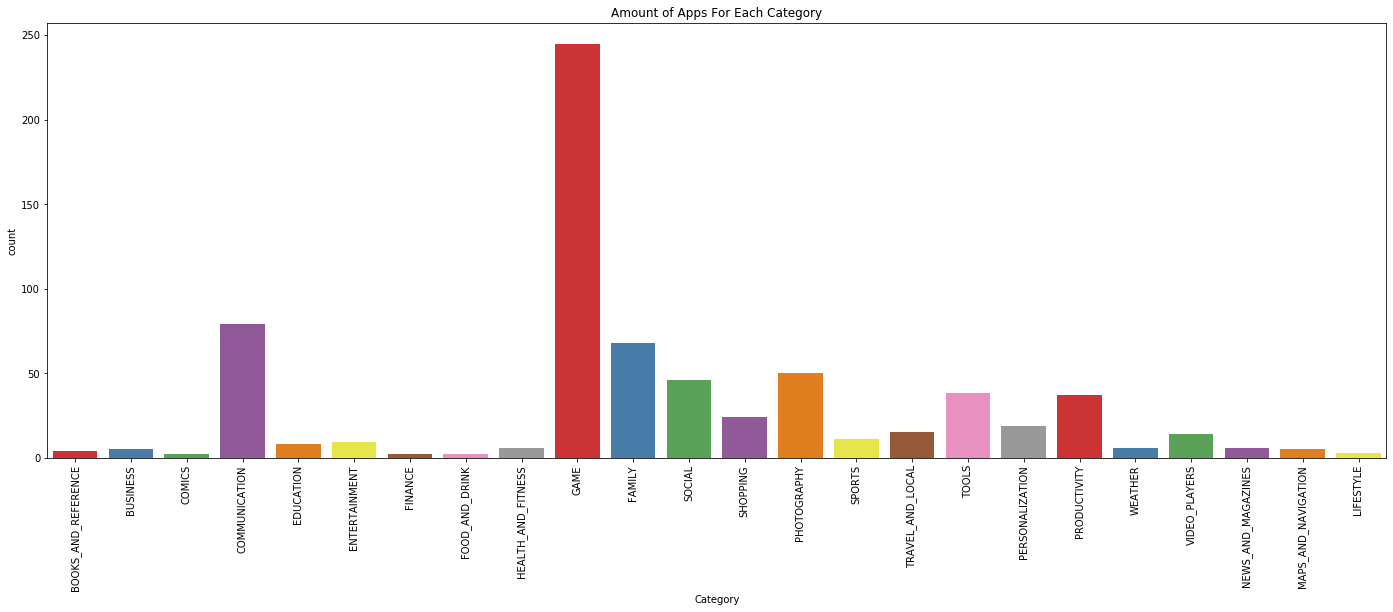

In [18]:
fig4, ax4 = plt.subplots(1,1)
fig4.set_size_inches(24,8)

fa = sns.countplot(x="Category", data=famous_apps, palette="Set1")
fa.set_xticklabels(fa.get_xticklabels(), rotation=90)
fa.set_title("Amount of Apps For Each Category")

In [19]:
print(len(famous_apps['Category'].unique()), ' \n', famous_apps['Category'].unique())

24  
 ['BOOKS_AND_REFERENCE' 'BUSINESS' 'COMICS' 'COMMUNICATION' 'EDUCATION'
 'ENTERTAINMENT' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'GAME'
 'FAMILY' 'SOCIAL' 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL'
 'TOOLS' 'PERSONALIZATION' 'PRODUCTIVITY' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' 'LIFESTYLE']


### Amazing! Not only the amount of categories dropped from 32 to 24 but also the 'Game' has quite the lead over other apps with 250 apps with over 1 Million reviews! But, Thats not enough...Let's see that average quality of those app categories

In [20]:
import warnings
warnings.filterwarnings('ignore')
famous_apps['Rating'] = famous_apps['Rating'].apply(lambda x: float(x))
famous_apps['Rating'].dtypes

dtype('float64')

Text(0.5, 1.0, 'Famous Apps Rating Distirbution')

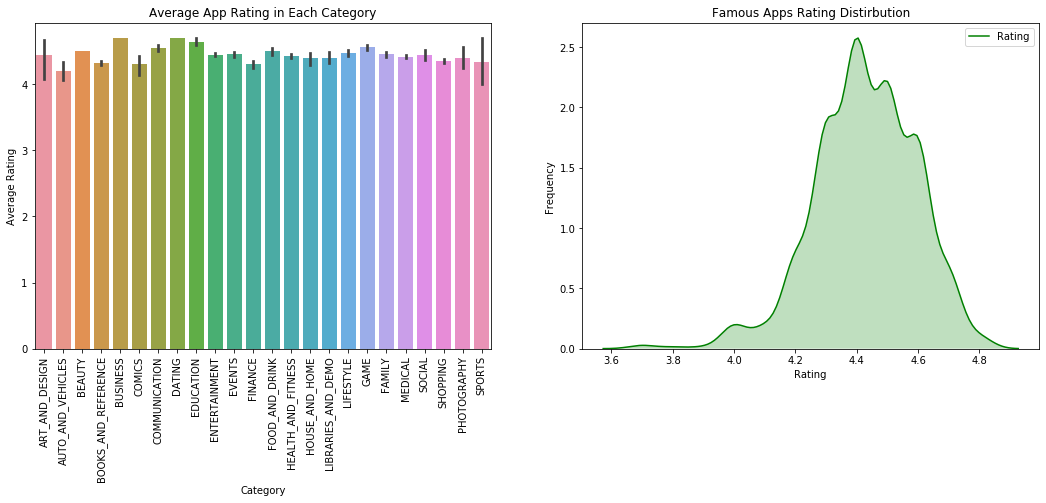

In [21]:
fig5, ax5 = plt.subplots(1, 2)
fig5.set_size_inches(18,6)

sns.barplot(x="Category", y="Rating", data=famous_apps, ax=ax5[0])
ax5[0].set_xticklabels(cp.get_xticklabels(), rotation=90)
ax5[0].set_ylabel('Average Rating')
ax5[0].set_title('Average App Rating in Each Category')

sns.kdeplot(famous_apps['Rating'], shade=True, color="g", ax=ax5[1])
ax5[1].set_ylabel('Frequency')
ax5[1].set_xlabel('Rating')
ax5[1].set_title('Famous Apps Rating Distirbution')

### Now this is very impressive! All of the famous apps' average rating is above 4.0 and we can see that from the barplot and the rating distribution plot.

In [22]:
famous_apps.Installs.unique()

array(['100,000,000+', '1,000,000,000+', '10,000,000+', '50,000,000+',
       '500,000,000+'], dtype=object)

In [23]:
famous_apps.Installs = famous_apps.Installs.str.replace('+', '')
famous_apps.Installs = famous_apps.Installs.str.replace(',','')
famous_apps.Installs = famous_apps.Installs.apply(lambda x: int(x))

### Before exploring the Installations for each Category I decided to remove the '+' and ',' characters and transformed the values to integers

Text(0.5, 1.0, 'Famous Apps Installs Distirbution')

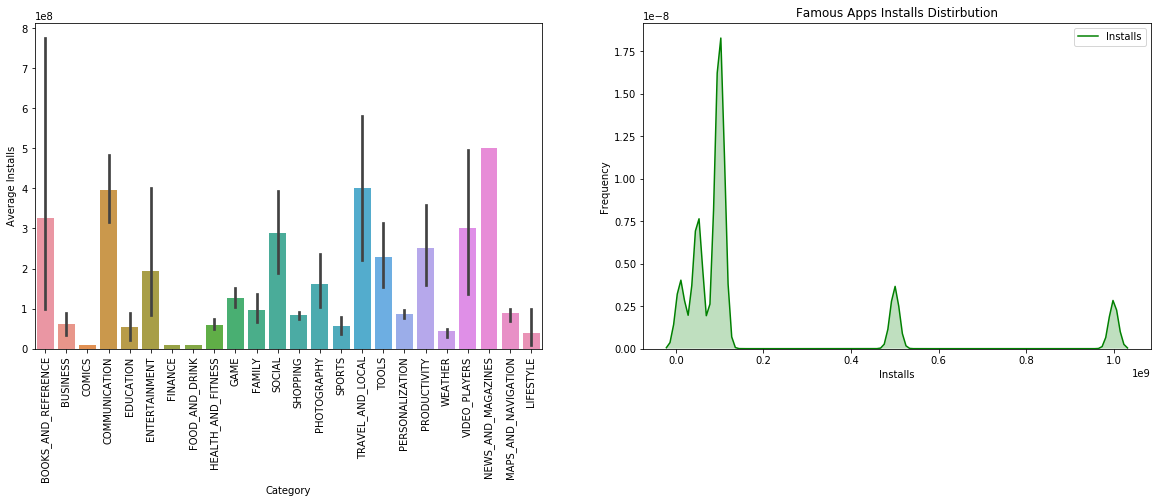

In [24]:
fig6, ax6 = plt.subplots(1,2)
fig6.set_size_inches(20,6)

sns.barplot( x='Category', y='Installs',data=famous_apps, ax=ax6[0])
ax6[0].set_xticklabels(ax6[0].get_xticklabels(), rotation=90)
ax6[0].set_ylabel('Average Installs')

sns.kdeplot(famous_apps['Installs'], shade=True, color="g", ax=ax6[1])
ax6[1].set_ylabel('Frequency')
ax6[1].set_xlabel('Installs')
ax6[1].set_title('Famous Apps Installs Distirbution')

### We can see that most Installations are distributed between 50 million and 150 million with some apps reaching 500 million and even 1 billion! Let's check which kind of apps reached 1 billion installs.

In [25]:
df = famous_apps[famous_apps.Installs >= 1000000000]
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000,Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1000000000,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device


Text(0.5, 1.0, 'Amount of Apps with more than 1 billion installs')

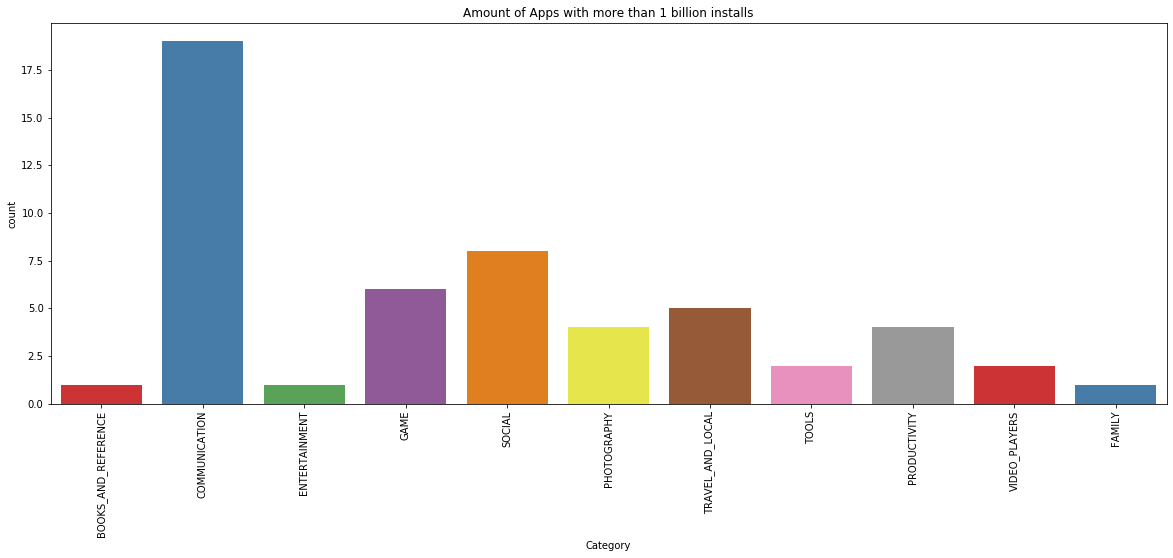

In [26]:
fig7, ax7 = plt.subplots(1,1)
fig7.set_size_inches(20,7)

sns.countplot(x="Category", data=df, palette="Set1")
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=90)
ax7.set_title('Amount of Apps with more than 1 billion installs')

### As we can see, 18 communication apps reached more than 1 billion downloads while other categories struggle to reach the 10 apps mark. This kinda shows our priorities when it comes to app categories. Now that we explored deeply enough it's time to come back to our original dataset and continue exploring other features.

In [27]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [44]:
data.Installs = data.Installs.str.replace('+', '')
data.Installs = data.Installs.str.replace(',','')
data.Installs = data.Installs.apply(lambda x: int(x))

data['Size'].replace('Varies with device', np.nan, inplace = True )
data['Size'] = (data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             data.Size.str.extract(r'[\d\.]+([kM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [0.001, 1.0]).astype(float))
data['Size'].fillna(data.groupby('Category')['Size'].transform('median'),inplace = True)

### I decided to clean the installs values like in the famous_apps dataset and decided to replace the 'Varies with device' values with NaNs and applying median of size for of apps in each category transformation. I also transformed the kilobyte sized values by dividing by 0.001 (1Mb = 1000kb)

In [46]:
data.Size.describe()

count    9360.000000
mean       21.517381
std        21.915723
min         0.008500
25%         6.100000
50%        14.000000
75%        29.000000
max       100.000000
Name: Size, dtype: float64

In [47]:
data.Price.value_counts()

0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
           ... 
$379.99       1
$6.49         1
$4.84         1
$13.99        1
$3.88         1
Name: Price, Length: 73, dtype: int64

In [48]:
data['Price'] = data.Price.str.replace('$', '')
data['Price'] = data.Price.apply(lambda x: float(x))

In [49]:
data.Price.value_counts()

0.00      8715
2.99       114
0.99       106
4.99        70
1.99        59
          ... 
299.99       1
1.59         1
1.61         1
3.90         1
2.90         1
Name: Price, Length: 73, dtype: int64

In [50]:
data.Price.describe()

count    9360.000000
mean        0.961279
std        15.821640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

### I cleaned the Price column by removing the dollar sign and transforming the values into floats. As we can see most of the apps are free (8715/9360 are free!). On the other hand, we can see that the most expensive app is 400 dollars! Let's check it out.

In [51]:
data.loc[data.Price == 400]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


<img src=https://lh3.googleusercontent.com/j1tsG7eaKkVidSRk6eE25bX7sQASNGdfrUof50UM7rKu-HV_Qg7dLeKyHPSxkx-myQ width=180 height=180/>

In [52]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


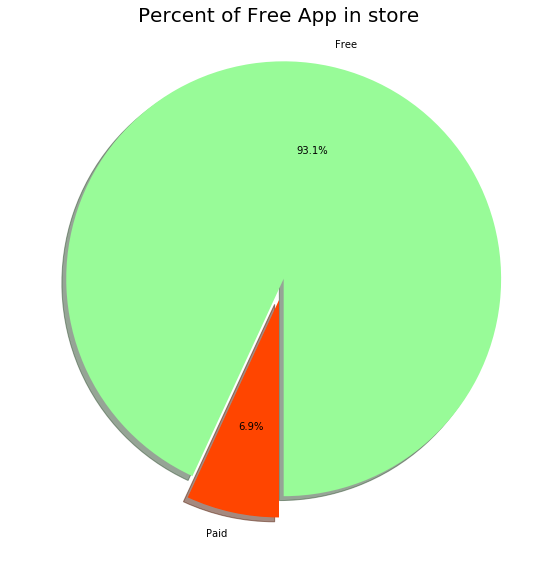

In [67]:
labels =data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)


colors = ["palegreen","orangered"]
explode = (0.1,0)  # explode 1st slice
 
plt.figure(figsize=(10,10))

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free App in store',size = 20)
plt.show()

### most of the apps in the dataset are free 

Text(0, 0.5, 'Average Rating')

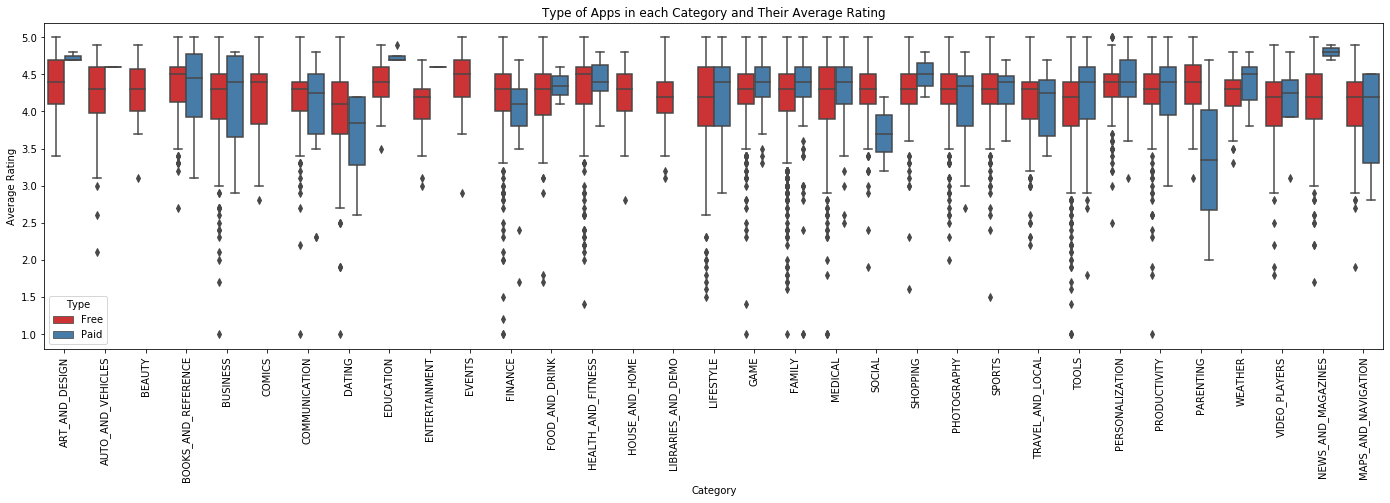

In [53]:
fig8, ax8 = plt.subplots(1,1)
fig8.set_size_inches(24, 6)

sns.boxplot(x="Category", y='Rating', hue="Type", data=data, palette="Set1", ax=ax8)
ax8.set_xticklabels(ax8.get_xticklabels(), rotation=90)
ax8.set_title('Type of Apps in each Category and Their Average Rating')
ax8.set_ylabel('Average Rating')

### As we can see, although there are not so many 'Paid' apps their rating is still pretty high  in most categories (above 4.0)

In [68]:
data['Free'] = data['Type'].map(lambda s :1  if s =='Free' else 0)
data.drop(['Type'], axis=1, inplace=True)

### Creating a new binary column for 'Type'. if free then 1 will be placed else 0 will be placed

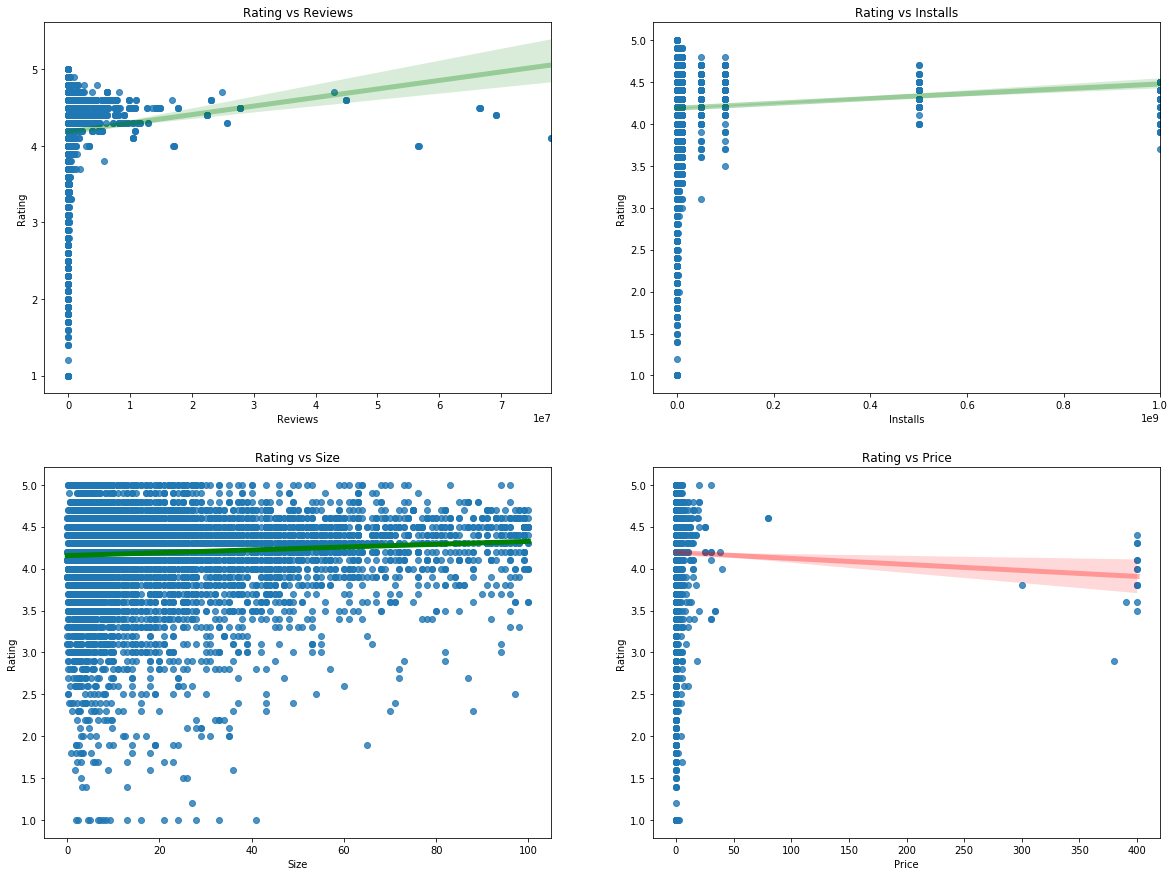

In [73]:
fig9, ax9 = plt.subplots(2,2)
fig9.set_size_inches(20,15)

sns.regplot(x='Reviews', y='Rating', data=data, line_kws={"color":"g","alpha":0.3,"lw":5}, ax=ax9[0][0])
ax9[0][0].set_title('Rating vs Reviews')

sns.regplot(x='Installs', y='Rating', data=data, line_kws={"color":"g","alpha":0.3,"lw":5}, ax=ax9[0][1])
ax9[0][1].set_title('Rating vs Installs')

sns.regplot(x='Size', y='Rating', data=data, line_kws={"color":"g","alpha":1,"lw":5}, ax=ax9[1][0])
ax9[1][0].set_title('Rating vs Size')

sns.regplot(x='Price', y='Rating', data=data, line_kws={"color":"r","alpha":0.3,"lw":5}, ax=ax9[1][1])
ax9[1][1].set_title('Rating vs Price')

fig9.savefig('regplots.png')

## By applying the scatter plots  and adding linear regression we can clearly see a positive linearity between Rating and Reviews and Rating and Installs, which means that the more Reviews and Installs an app has the higher it's rating will be. On the other hand, we can see a negative linearity between Rating and Price, which means that the higer the app's price  the more likely it will get a low rating. The intresting plot here is the rating vs size which shows that the bigger the app's size the more likely it will get a higher rating. The most logical explentation is that the bigger the app's size the higher its quality and its functionality. Let's check some examples 

In [70]:
data[data.Size >= 40].head(15)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free
50,Real Tractor Farming,AUTO_AND_VEHICLES,4.0,1598,56.0,1000000,0.0,Everyone,Auto & Vehicles,"July 26, 2018",11.0,4.1 and up,1
51,Ultimate F1 Racing Championship,AUTO_AND_VEHICLES,3.8,284,57.0,100000,0.0,Everyone,Auto & Vehicles,"July 26, 2018",3.0,4.1 and up,1
57,Extreme Rally Championship,AUTO_AND_VEHICLES,4.2,129,54.0,100000,0.0,Everyone,Auto & Vehicles,"July 26, 2018",3.0,4.1 and up,1
103,Beauty Selfie Camera,BEAUTY,4.2,2225,52.0,500000,0.0,Everyone,Beauty,"February 28, 2018",1.6,4.1 and up,1
122,"Sephora: Skin Care, Beauty Makeup & Fragrance ...",BEAUTY,4.5,26834,57.0,1000000,0.0,Everyone,Beauty,"July 24, 2018",18.5,5.0 and up,1
169,English Persian Dictionary,BOOKS_AND_REFERENCE,4.5,26875,73.0,500000,0.0,Everyone,Books & Reference,"August 1, 2018",6.0.8,4.0.3 and up,1
184,Azpen eReader,BOOKS_AND_REFERENCE,3.5,156,42.0,500000,0.0,Everyone,Books & Reference,"February 15, 2018",3.1.7.9,2.2 and up,1
205,Polaris Office for LG,BUSINESS,4.2,30847,55.0,5000000,0.0,Everyone,Business,"February 8, 2018",7.3.21,4.1 and up,1
242,Insightly CRM,BUSINESS,3.8,1383,51.0,100000,0.0,Everyone,Business,"July 12, 2018",3.24.1,5.0 and up,1
243,QuickBooks Accounting: Invoicing & Expenses,BUSINESS,4.3,23175,41.0,1000000,0.0,Everyone,Business,"July 13, 2018",18.7,4.1 and up,1


Text(0.5, 1.0, 'Distirbution of Size')

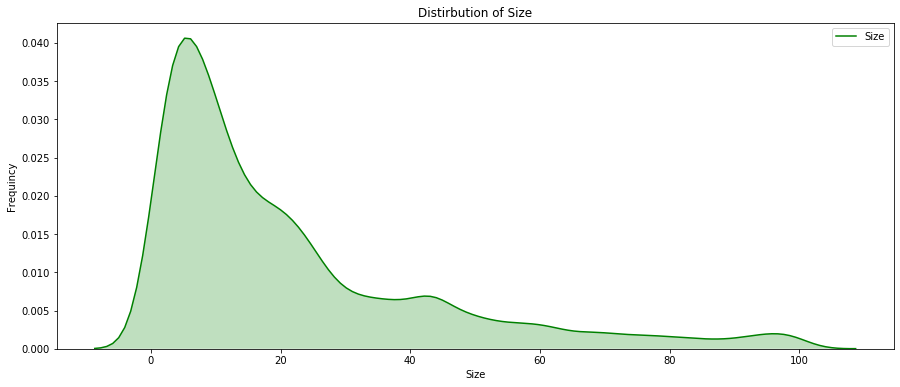

In [71]:
plt.figure(figsize = (15,6))
sns.kdeplot(data.Size, shade=True, color="g",)
plt.xlabel('Size')
plt.ylabel('Frequincy')
plt.title('Distirbution of Size')

### Most app sizes are between 5Mb and 25Mb with some even reaching 100Mb. From this we can conclude that effect of app's size on app's rating is very low (as shown also in the regression plot)